In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve


In [2]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style('whitegrid')

In [4]:
df = pd.read_csv(r'UK_Accident.csv', parse_dates=['Date', 'Time'])

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [6]:
df.drop(columns=['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 
                 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location'], inplace=True)

In [7]:
print(df.sample(5))

        Accident_Index  Longitude  Latitude  Police_Force  Accident_Severity  \
1050402  201201PL60324      -0.01     51.46             1                  3   
440549        2.01E+12      -0.29     54.21            12                  1   
481851   200732B363407      -0.65     52.92            32                  3   
165015        2.01E+12      -2.57     51.47            52                  3   
1322434       2.01E+12      -0.12     51.25            45                  3   

         Number_of_Vehicles  Number_of_Casualties        Date  Day_of_Week  \
1050402                   1                     1  28/05/2012            2   
440549                    1                     2  20/08/2007            2   
481851                    1                     1  04/11/2007            1   
165015                    2                     1  18/01/2005            3   
1322434                   2                     2  16/11/2013            7   

                       Time  Local_Authority_(Dist

In [8]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 1504150
No. of cols: 28


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   Accident_Index                               1504150 non-null  object        
 1   Longitude                                    1504049 non-null  float64       
 2   Latitude                                     1504150 non-null  float64       
 3   Police_Force                                 1504150 non-null  int64         
 4   Accident_Severity                            1504150 non-null  int64         
 5   Number_of_Vehicles                           1504150 non-null  int64         
 6   Number_of_Casualties                         1504150 non-null  int64         
 7   Date                                         1504150 non-null  object        
 8   Day_of_Week                                  1504150

In [10]:
df.isna().any()

Accident_Index                                 False
Longitude                                       True
Latitude                                       False
Police_Force                                   False
Accident_Severity                              False
Number_of_Vehicles                             False
Number_of_Casualties                           False
Date                                           False
Day_of_Week                                    False
Time                                            True
Local_Authority_(District)                     False
1st_Road_Class                                 False
1st_Road_Number                                False
Road_Type                                      False
Speed_limit                                    False
Junction_Control                                True
2nd_Road_Class                                 False
2nd_Road_Number                                False
Pedestrian_Crossing-Human_Control             

In [11]:
df.isnull().sum() / len(df) * 100

Accident_Index                                 0.00
Longitude                                      0.01
Latitude                                       0.00
Police_Force                                   0.00
Accident_Severity                              0.00
Number_of_Vehicles                             0.00
Number_of_Casualties                           0.00
Date                                           0.00
Day_of_Week                                    0.00
Time                                           0.01
Local_Authority_(District)                     0.00
1st_Road_Class                                 0.00
1st_Road_Number                                0.00
Road_Type                                      0.00
Speed_limit                                    0.00
Junction_Control                              40.08
2nd_Road_Class                                 0.00
2nd_Road_Number                                0.00
Pedestrian_Crossing-Human_Control              0.00
Pedestrian_C

In [12]:
df.dropna(subset=['Longitude', 'Time', 'Pedestrian_Crossing-Human_Control', 
                  'Pedestrian_Crossing-Physical_Facilities'], inplace=True)

In [13]:
dup_rows = df[df.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])


No. of duplicate rows:  34155


In [14]:
df.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  1469735


In [15]:
df.describe(include=np.number)


,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00,1469735.00
mean,-1.43,52.58,30.78,2.84,1.83,1.35,4.12,353.52,4.09,1008.85,39.08,2.66,380.11,1.36,2009.31
std,1.40,1.45,25.51,0.40,0.72,0.83,1.92,259.24,1.43,1821.62,14.17,3.21,1300.94,0.48,3.02
min,-7.52,49.91,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-1.00,10.00,-1.00,-1.00,1.00,2005.00
25%,-2.36,51.49,7.00,3.00,1.00,1.00,2.00,122.00,3.00,0.00,30.00,-1.00,0.00,1.00,2006.00
50%,-1.39,52.28,31.00,3.00,2.00,1.00,4.00,328.00,4.00,129.00,30.00,3.00,0.00,1.00,2010.00
75%,-0.22,53.46,46.00,3.00,2.00,1.00,6.00,531.00,6.00,726.00,50.00,6.00,0.00,2.00,2012.00
max,1.76,60.76,98.00,3.00,67.00,93.00,7.00,941.00,6.00,9999.00,70.00,6.00,9999.00,3.00,2014.00


In [16]:
df.describe(include=object)

,Accident_Index,Date,Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident
count,1469735,1469735,1469735,878055,1469735,1469735,1469735,1469735,1469735,35919,26767,1469735
unique,927301,3286,6,4,3,6,5,9,6,7,5,2
top,2.01E+12,21/10/2005,Single carriageway,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,Other object in carriageway,Yes
freq,370206,822,1100480,715644,1461091,1225277,1077129,1176480,1011352,16913,11549,1190075


In [17]:
numerical_data = df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

15

In [18]:
categorical_data = df.select_dtypes(include='object')
cat_cols = categorical_data.columns
len(cat_cols)

12

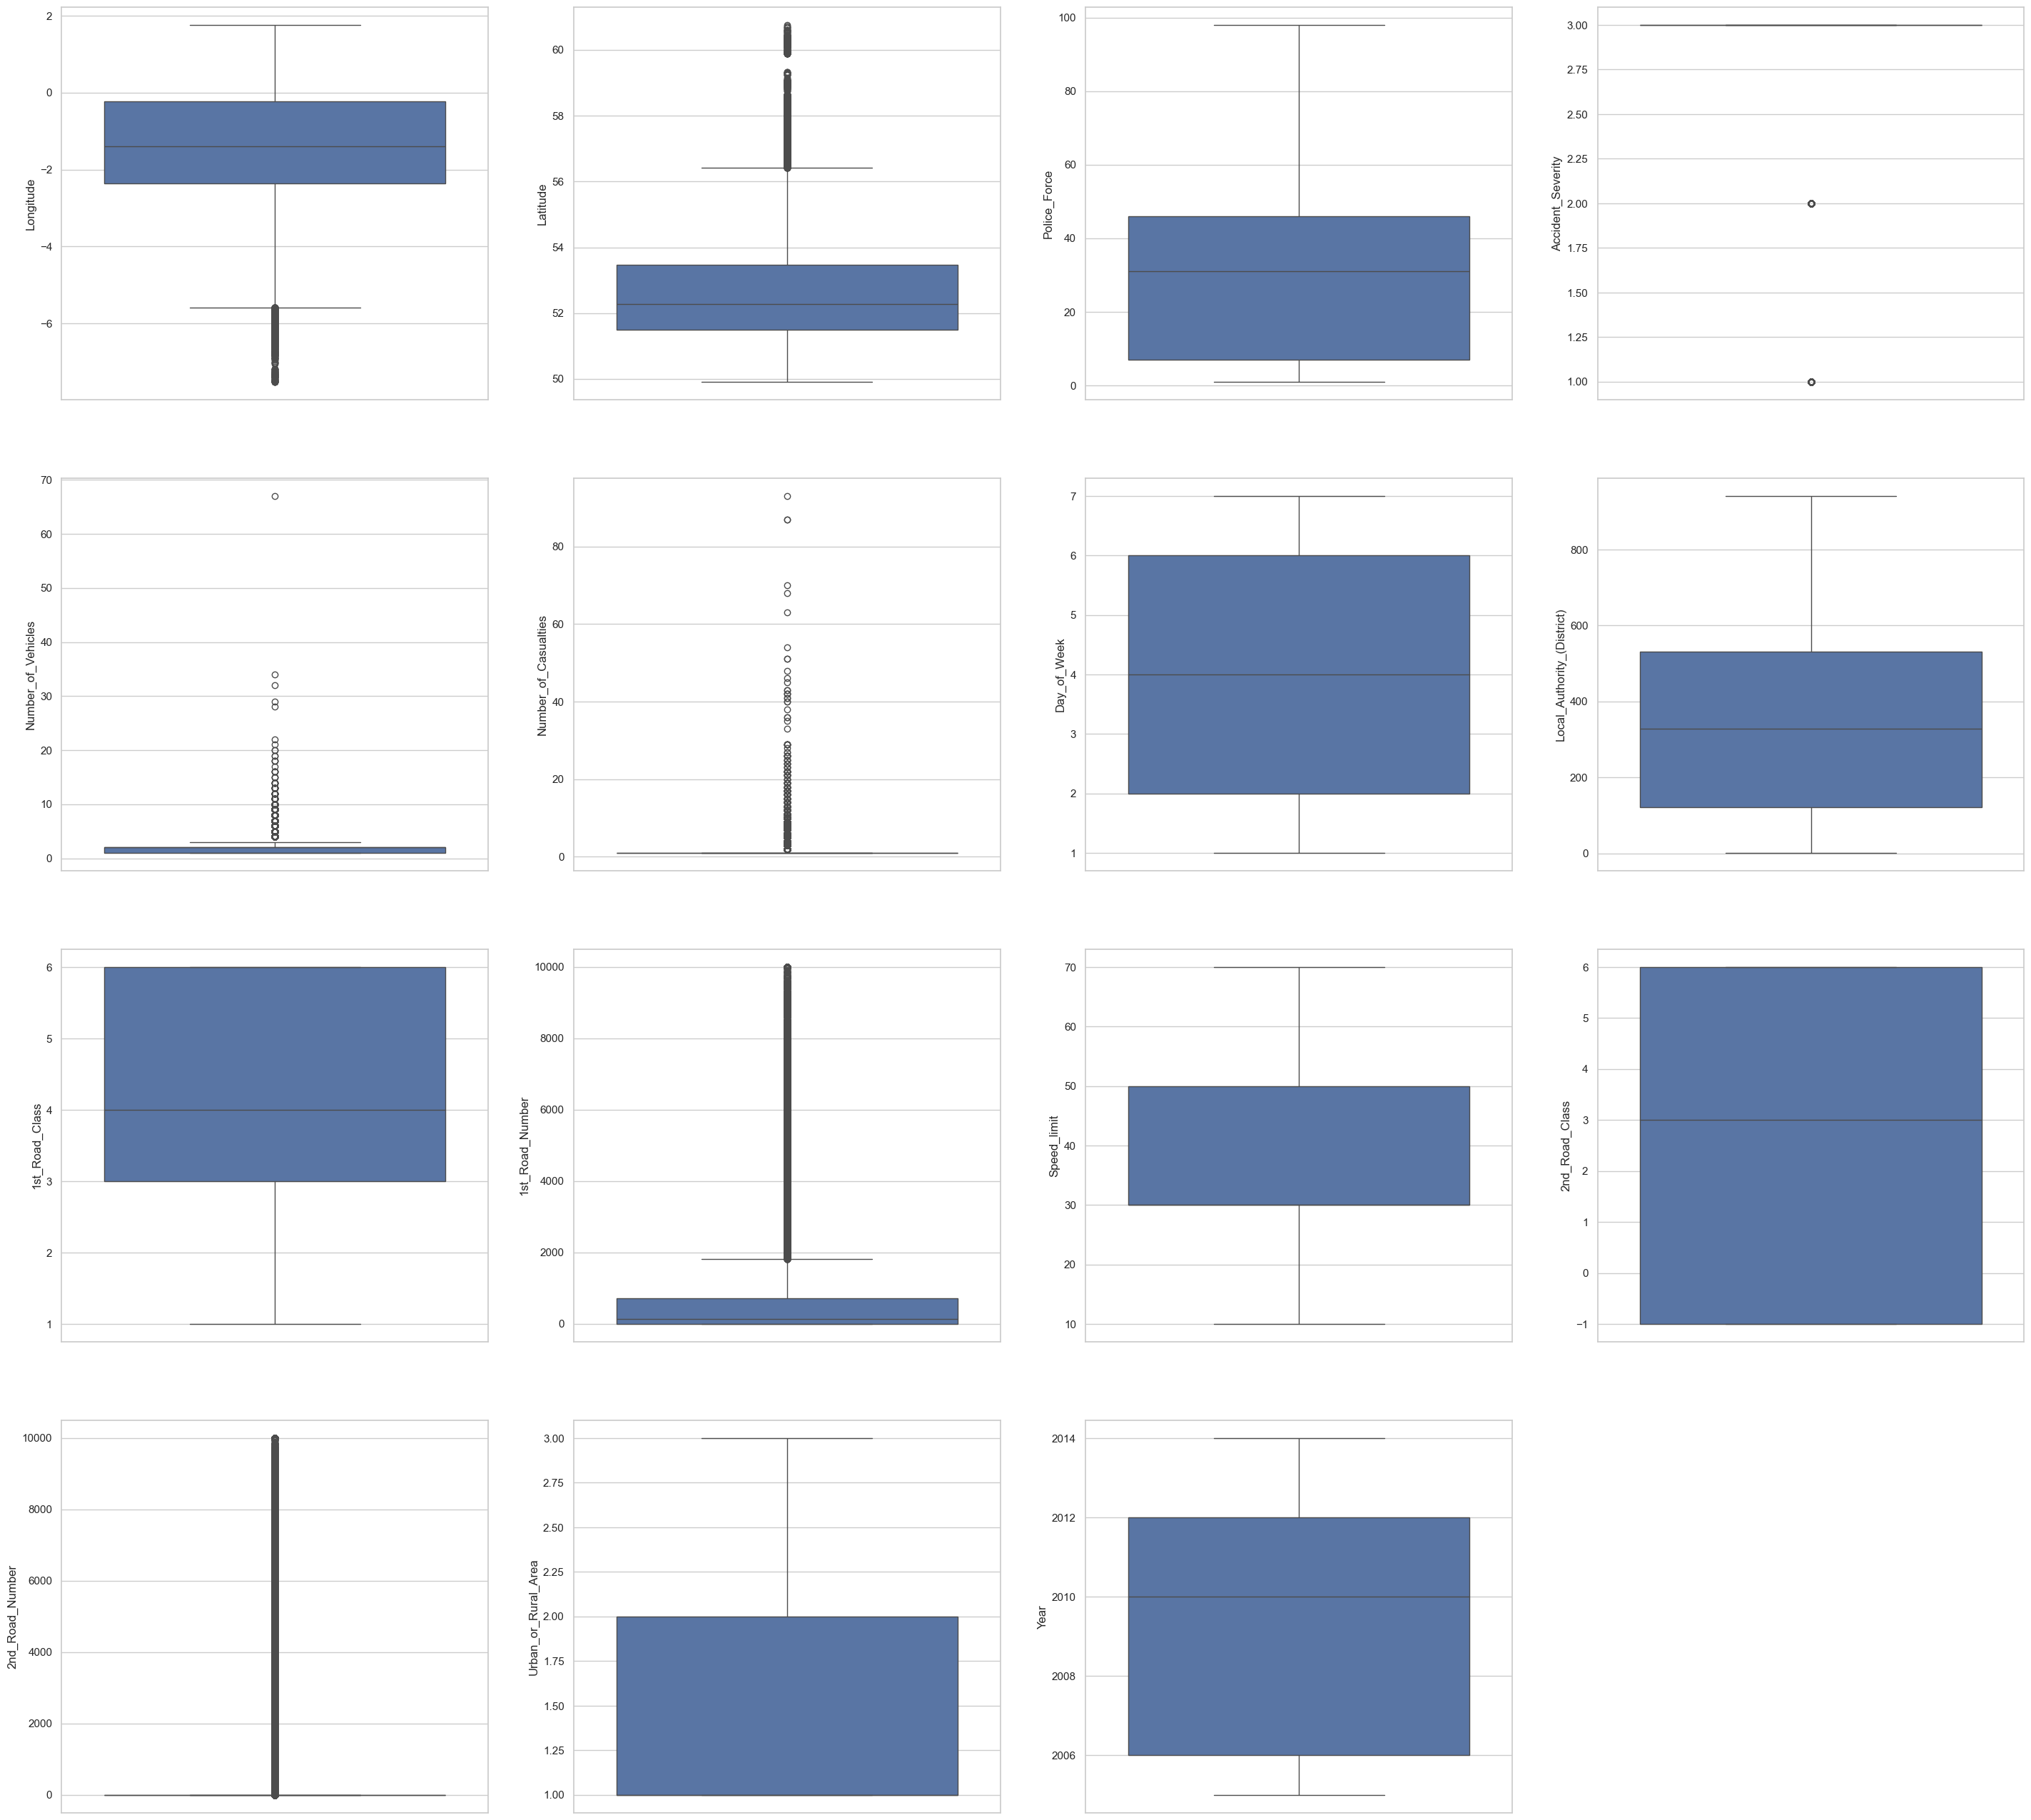

In [19]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(num_cols)+1):
    plt.subplot(6, 4, plot)
    sns.boxplot(y=df[num_cols[plot-1]])

plt.show()

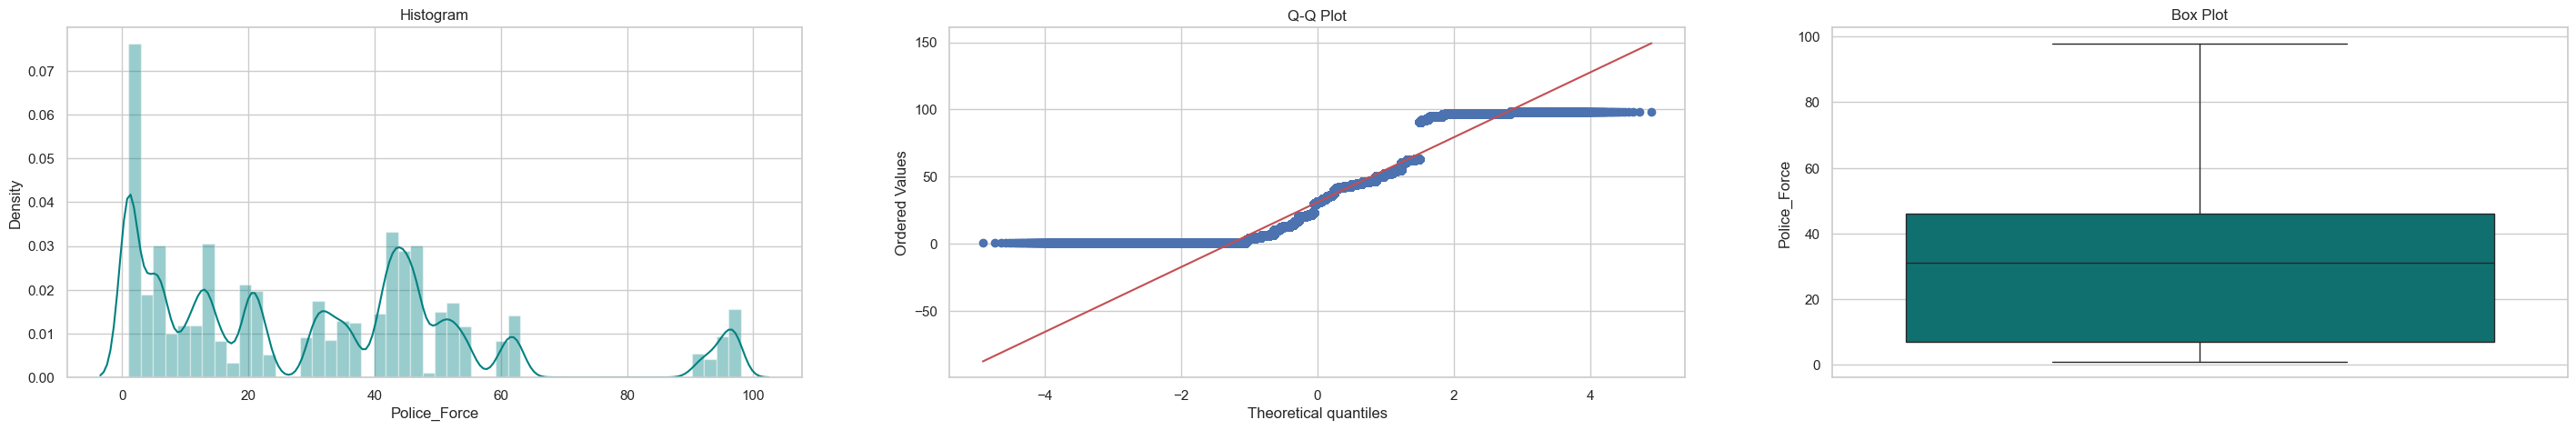

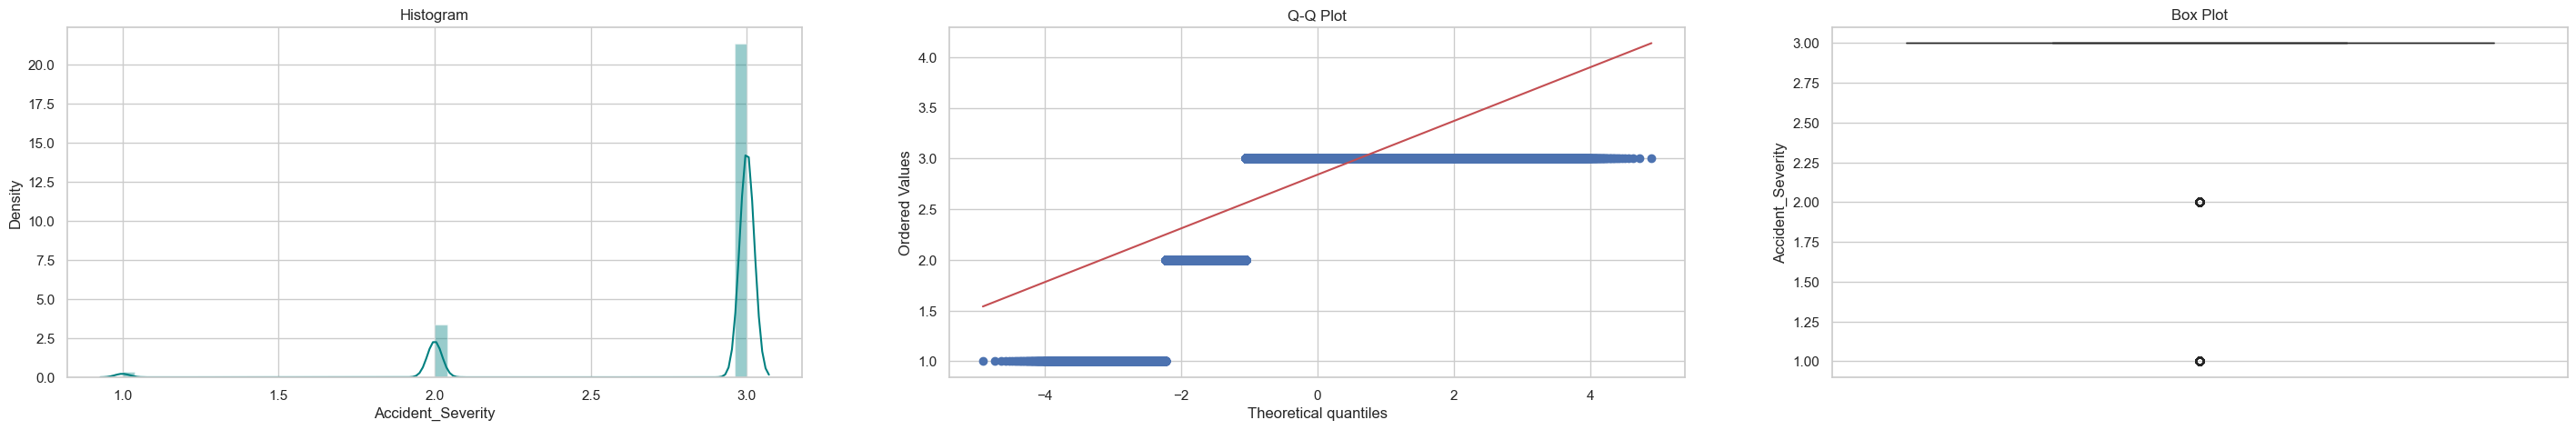

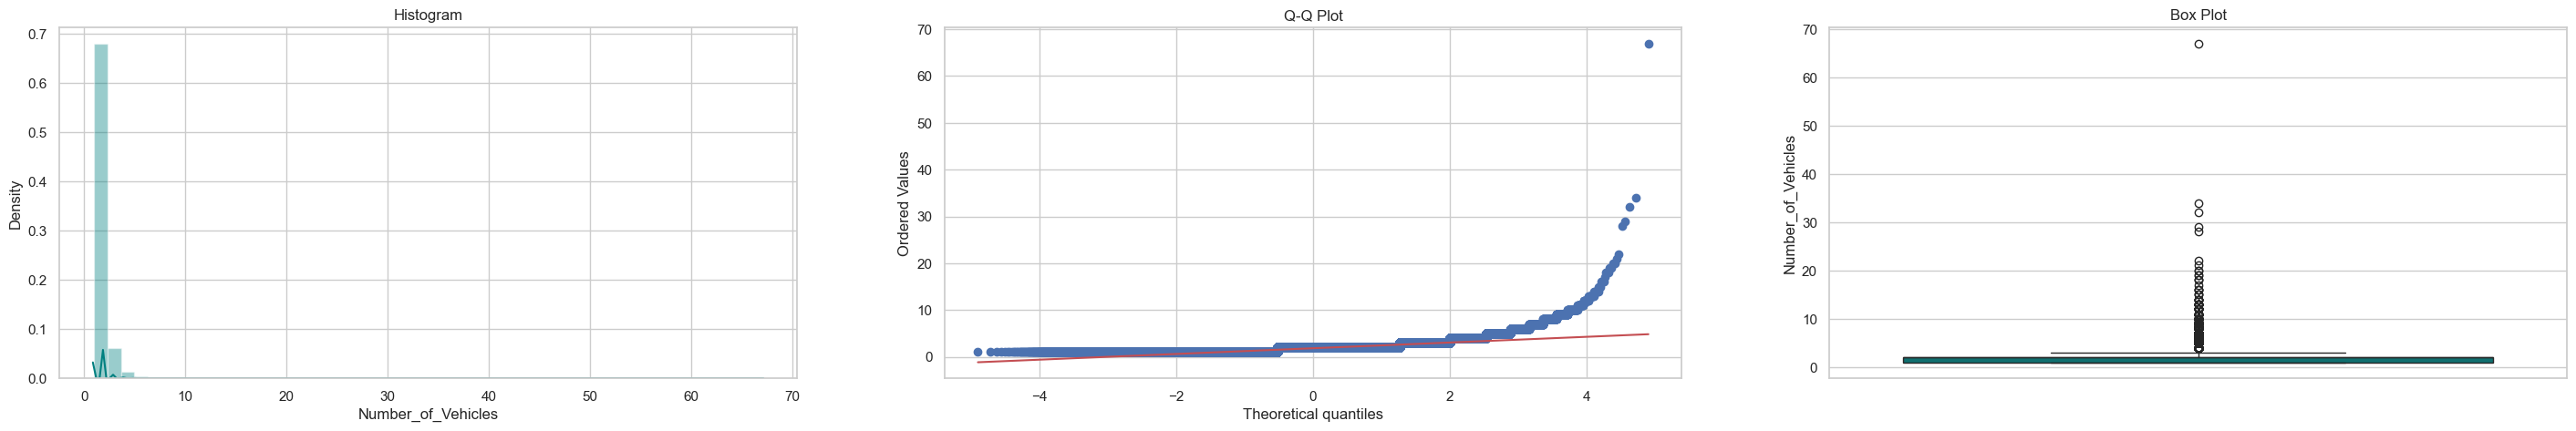

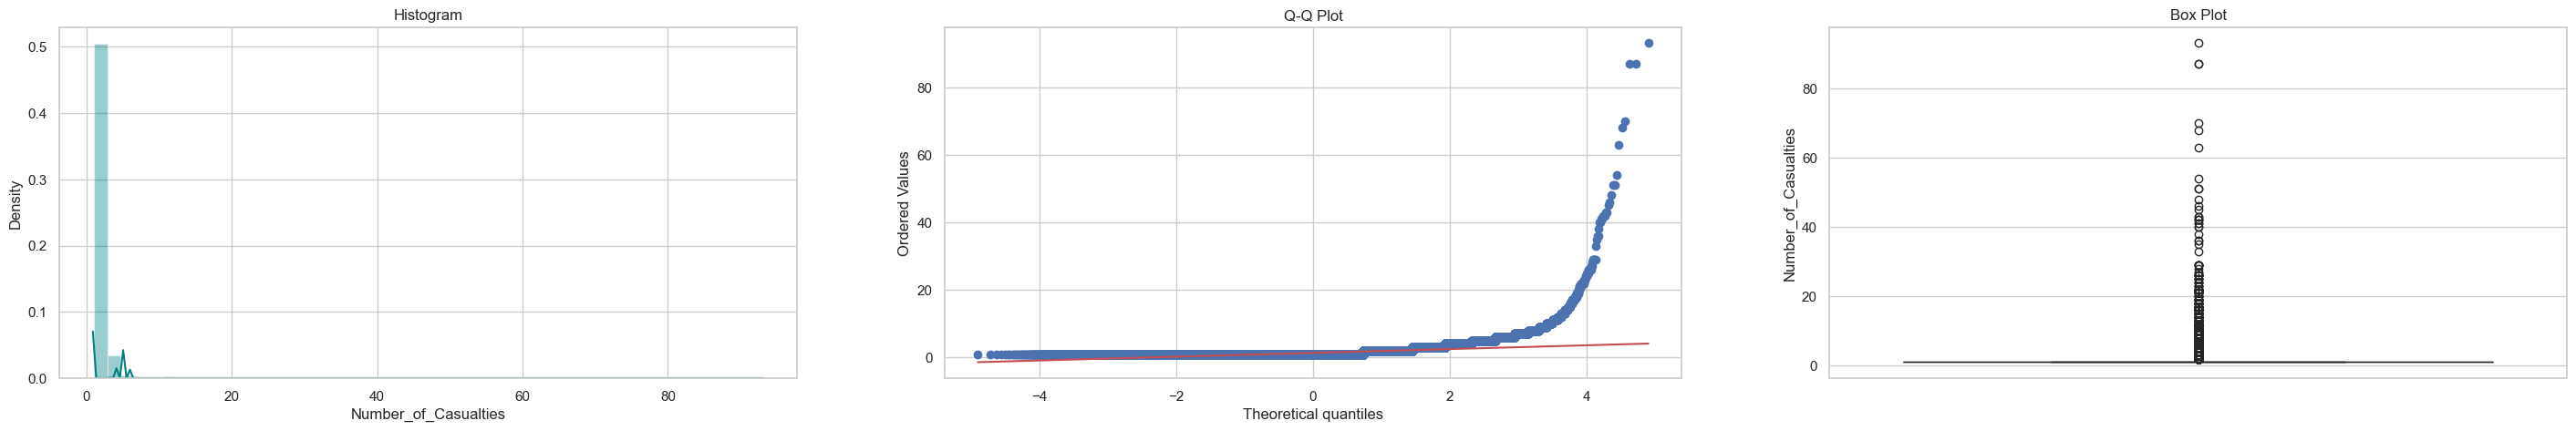

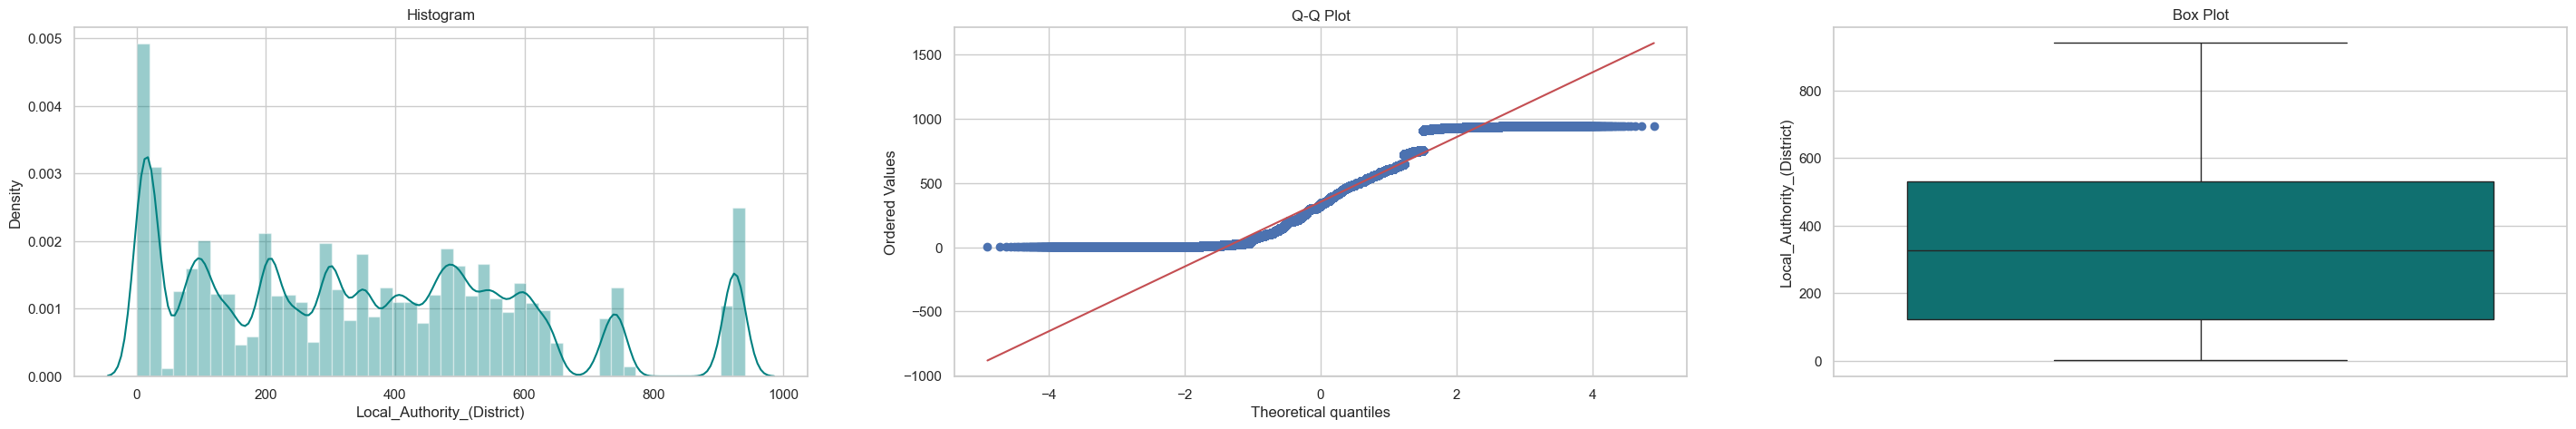

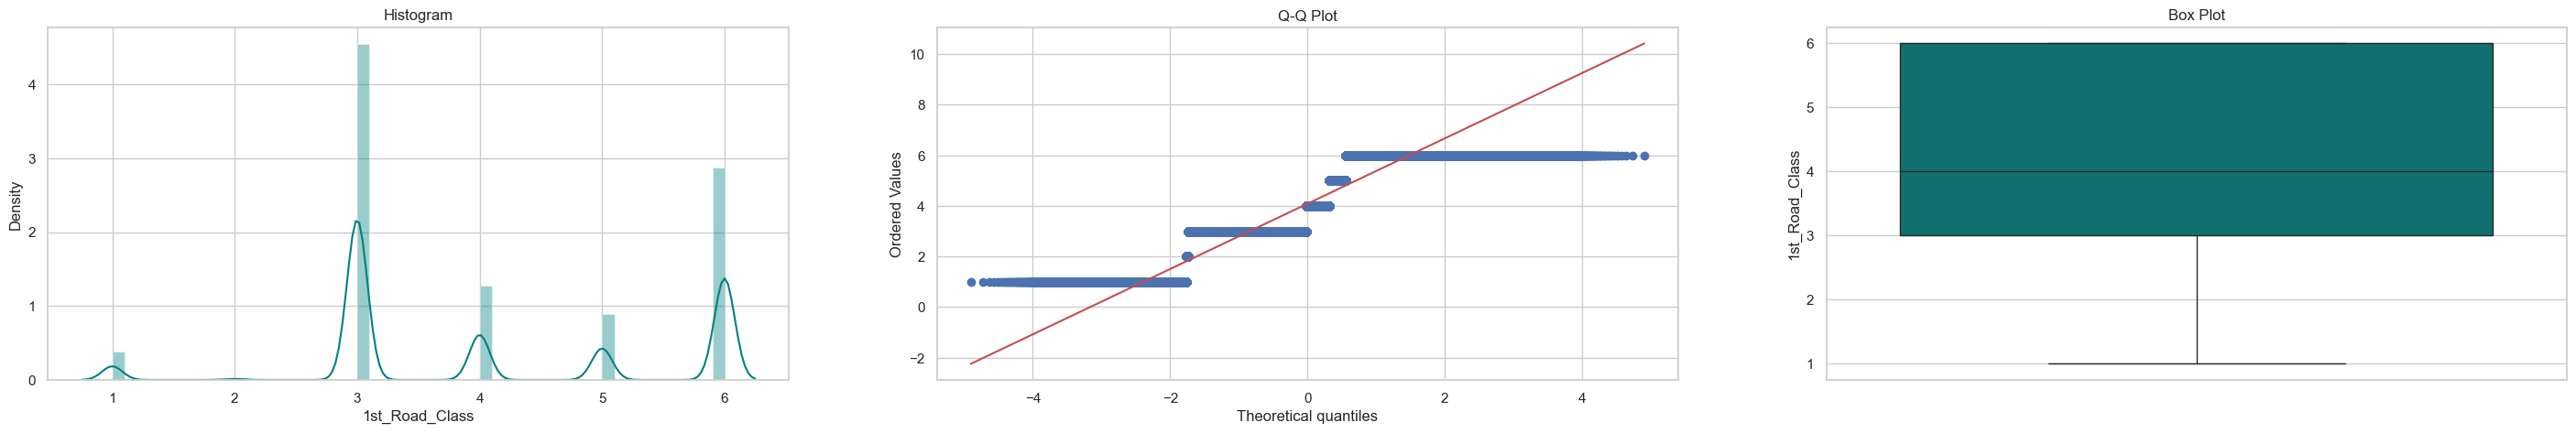

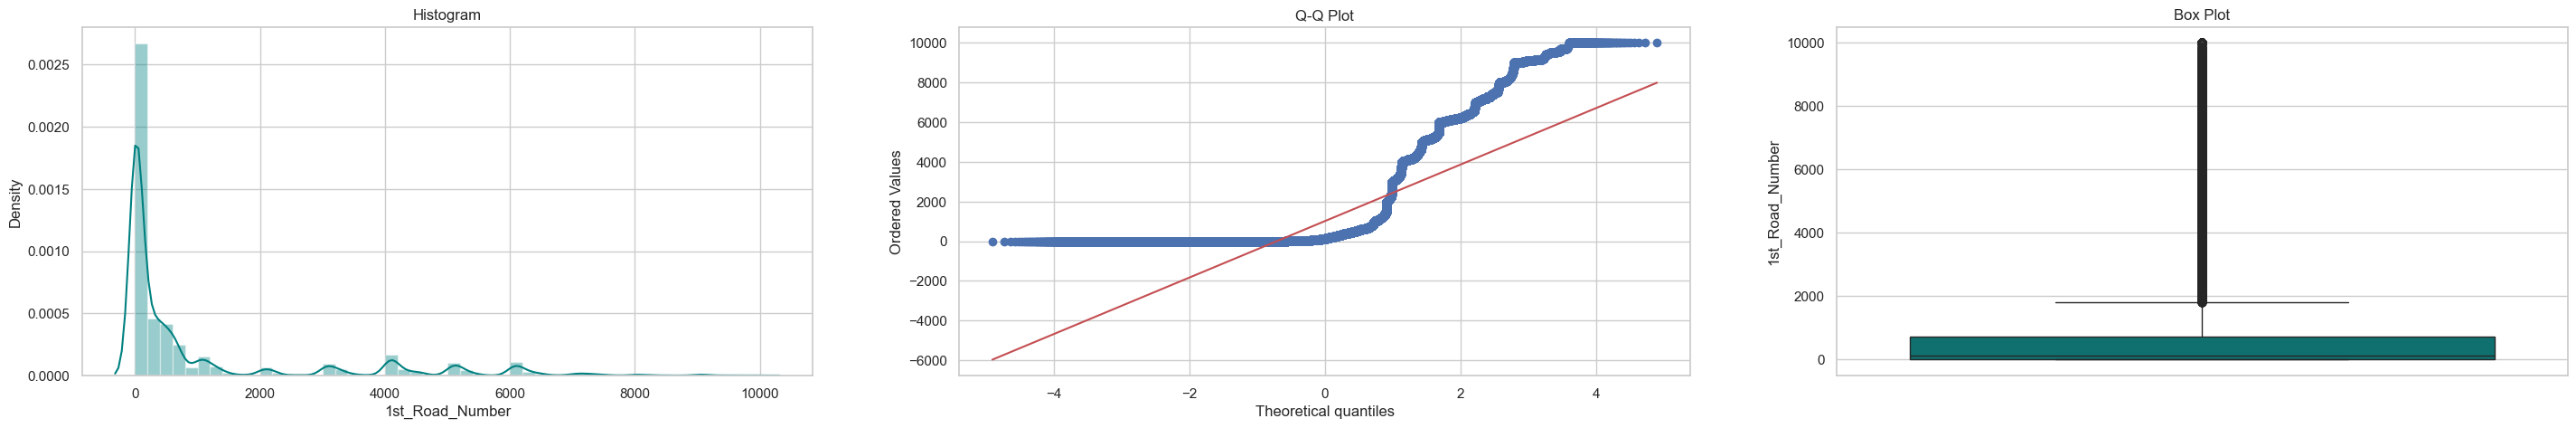

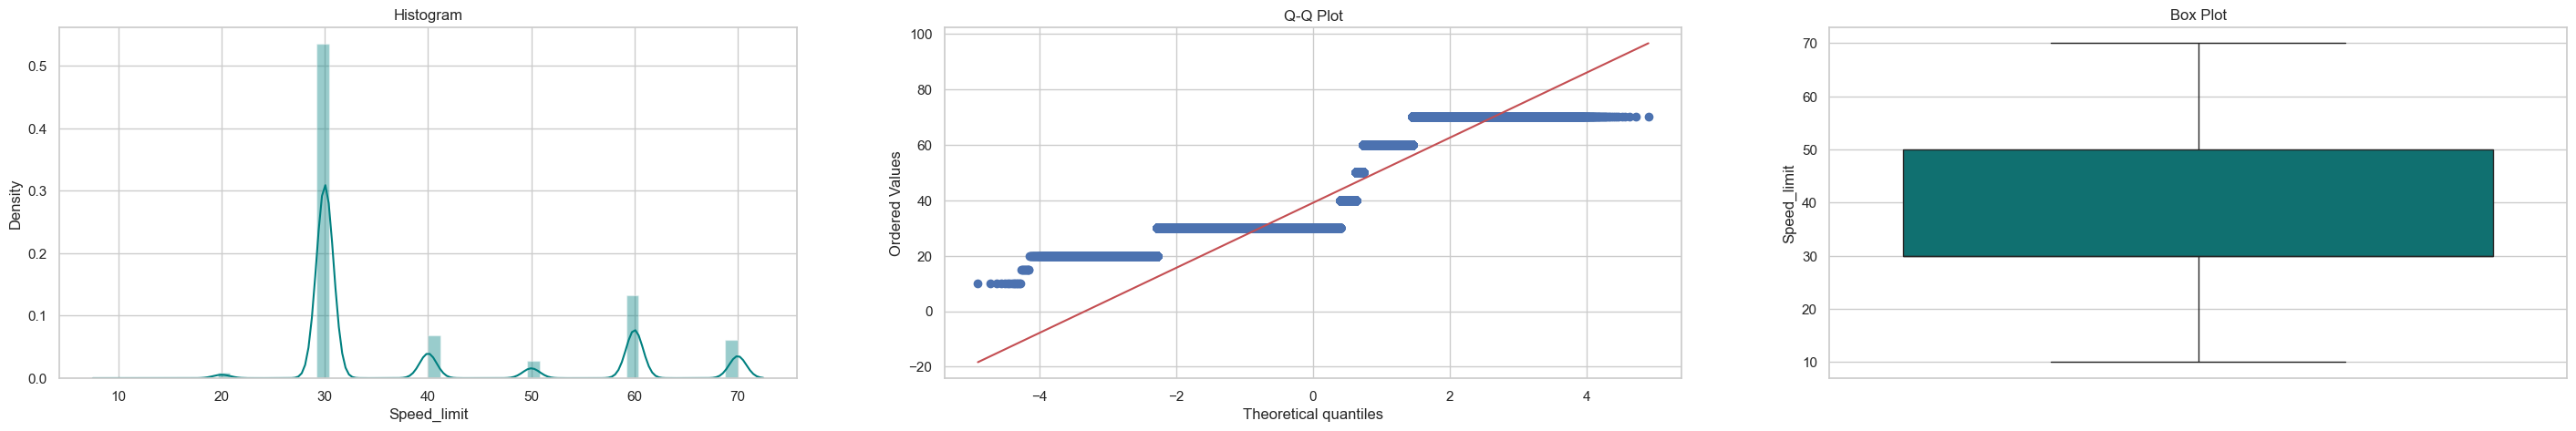

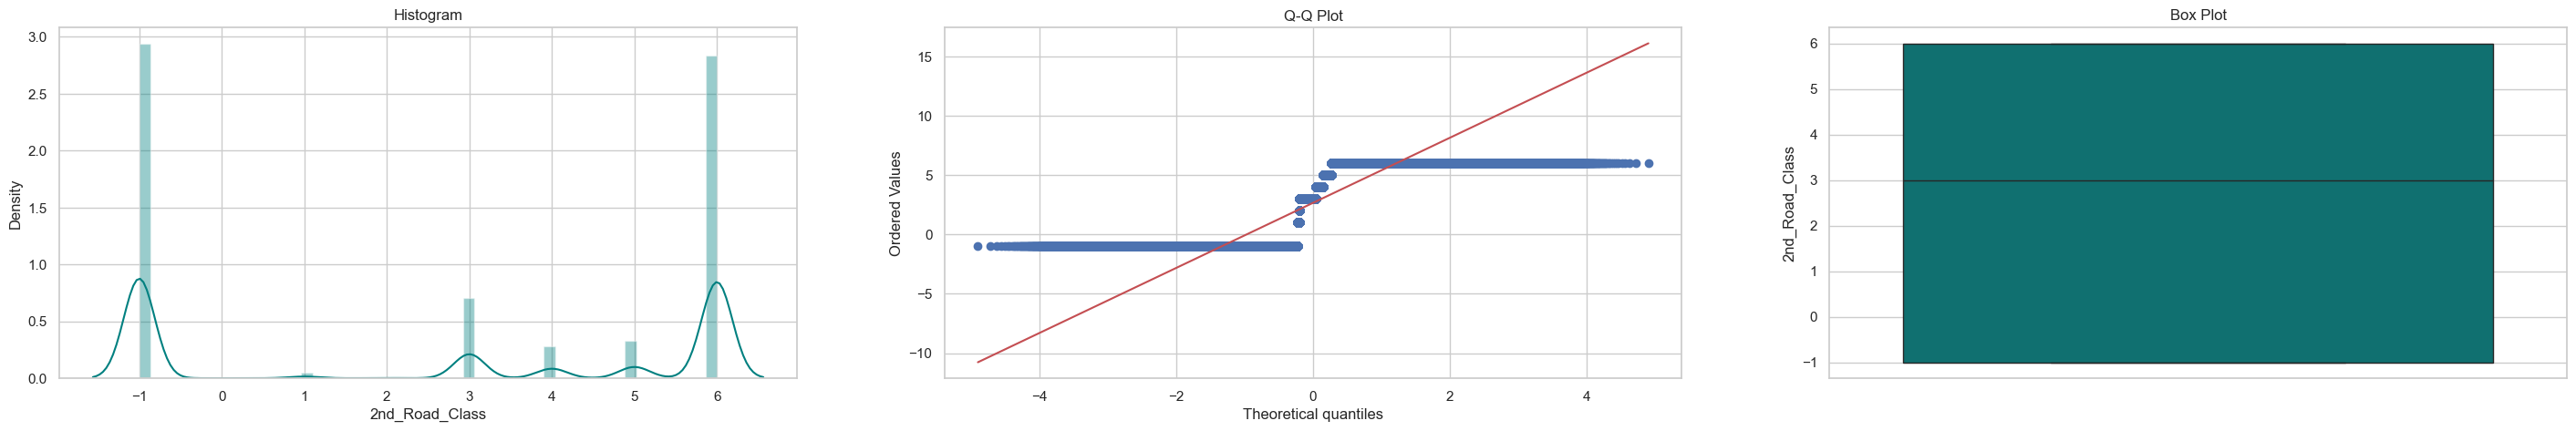

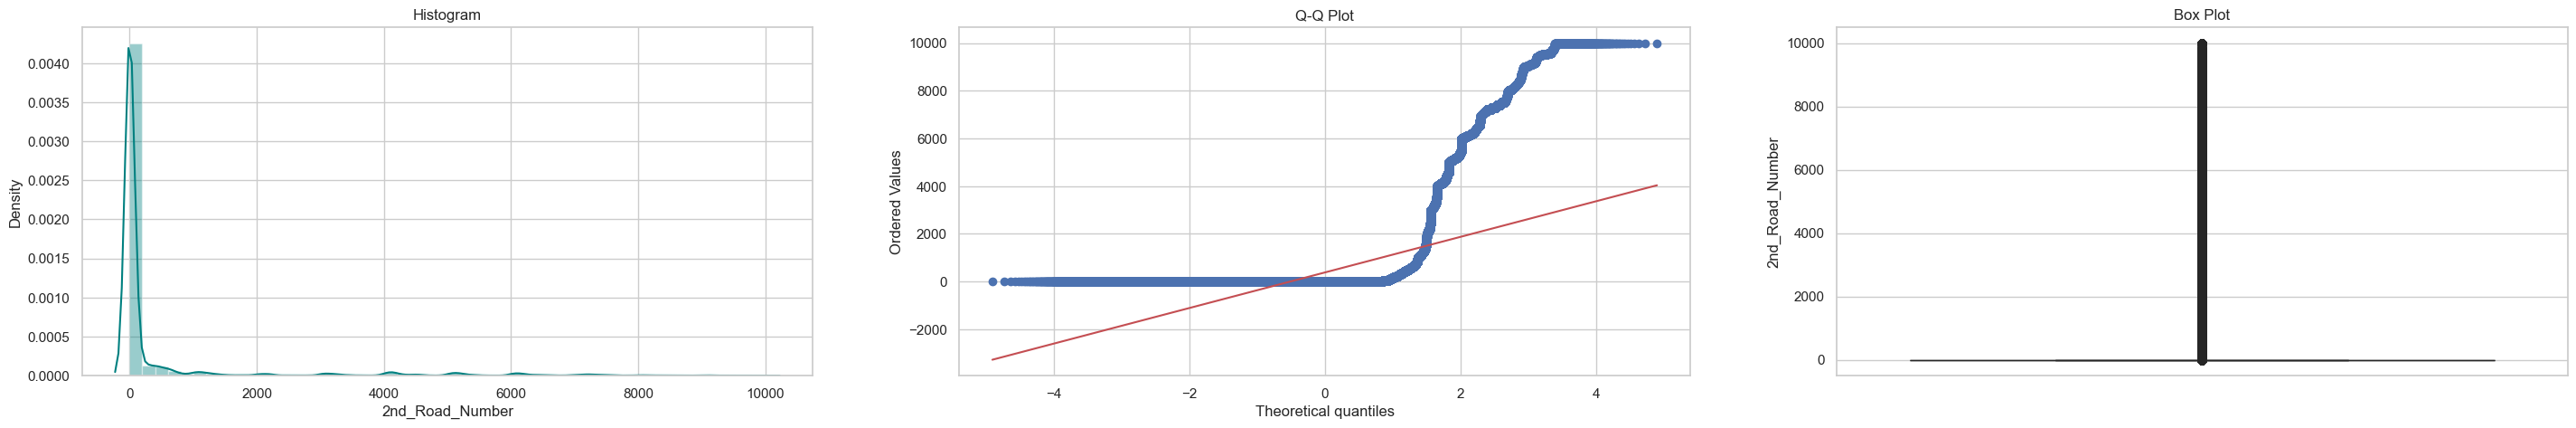

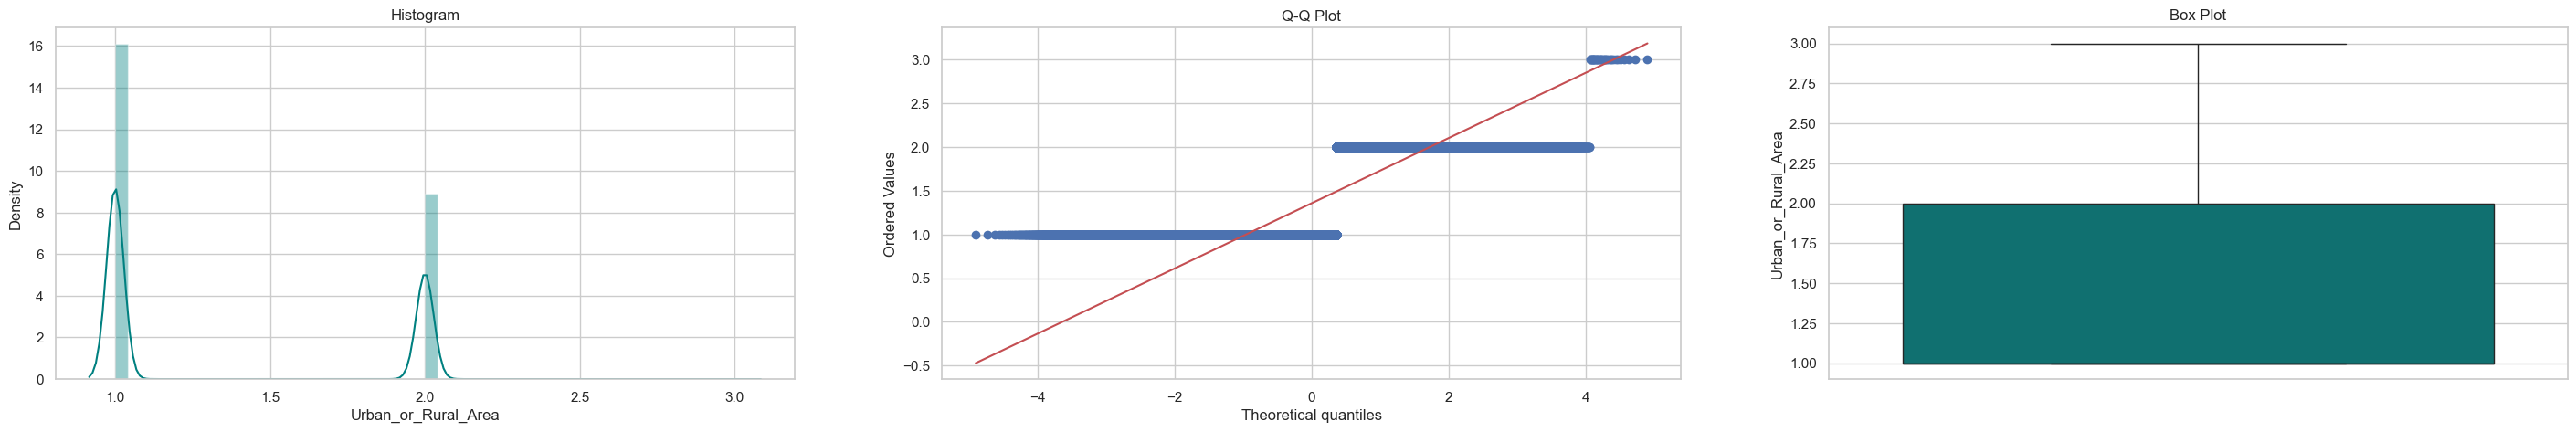

In [20]:
import scipy.stats as stats
def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='teal')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(data[col],color='teal')
    plt.title('Box Plot')
    
    plt.show()
dist_lst = ['Police_Force', 'Accident_Severity',
            'Number_of_Vehicles', 'Number_of_Casualties', 
            'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
            'Speed_limit', '2nd_Road_Class', '2nd_Road_Number',
            'Urban_or_Rural_Area']

for col in dist_lst:
    diagnostic_plot(df, col)

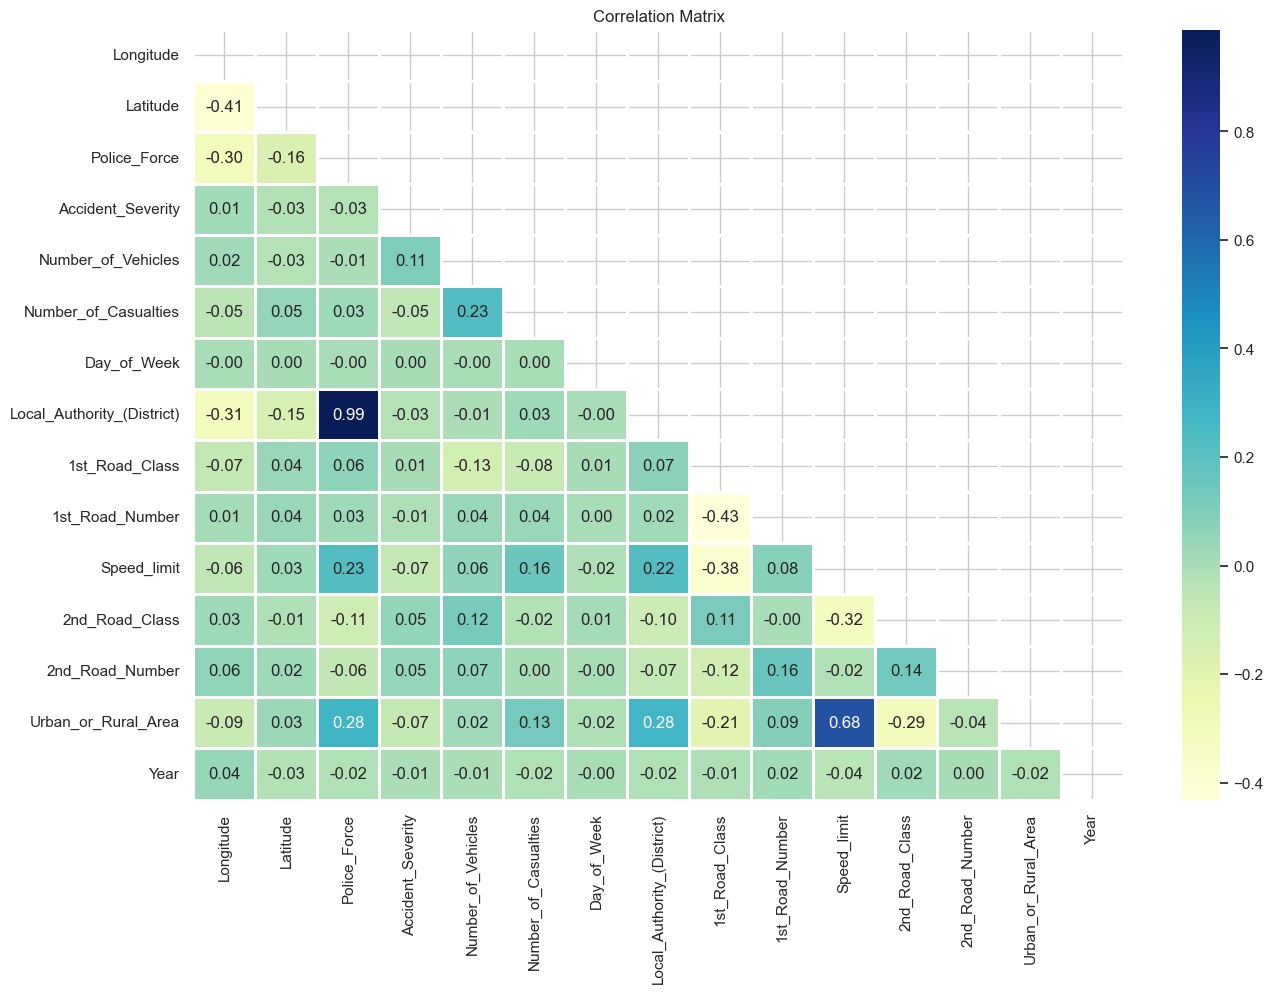

In [21]:
plt.figure(figsize = (15,10))
corr = df.select_dtypes(include='number').corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()
plt.close('all')


In [22]:
def get_corr(data, threshold):
    corr_col = set()
    cormat = data.select_dtypes(include='number').corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i, j]) > threshold:
                col_name = cormat.columns[i]
                corr_col.add(col_name)
    return corr_col

corr_features = get_corr(df, 0.80)
print(f"\nFeatures with >80% correlation: {corr_features}")
df.drop(columns=['Local_Authority_(District)'], axis=1, inplace=True) 


Features with >80% correlation: {'Local_Authority_(District)'}


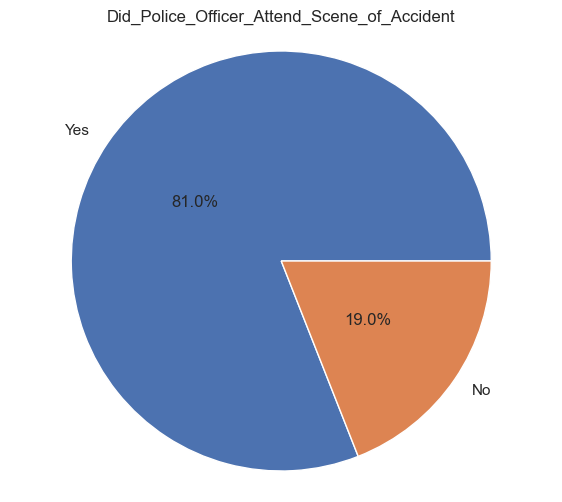

In [23]:
def pie_chart(data, col):

  x = data[col].value_counts().values
  plt.figure(figsize=(7, 6))
  plt.pie(x, center=(0, 0), radius=1.5, labels=data[col].unique(), 
          autopct='%1.1f%%', pctdistance=0.5)
  plt.title("Did_Police_Officer_Attend_Scene_of_Accident")
  plt.axis('equal')
  plt.show()

pie_lst = ['Did_Police_Officer_Attend_Scene_of_Accident']
for col in pie_lst:
  pie_chart(df, col)

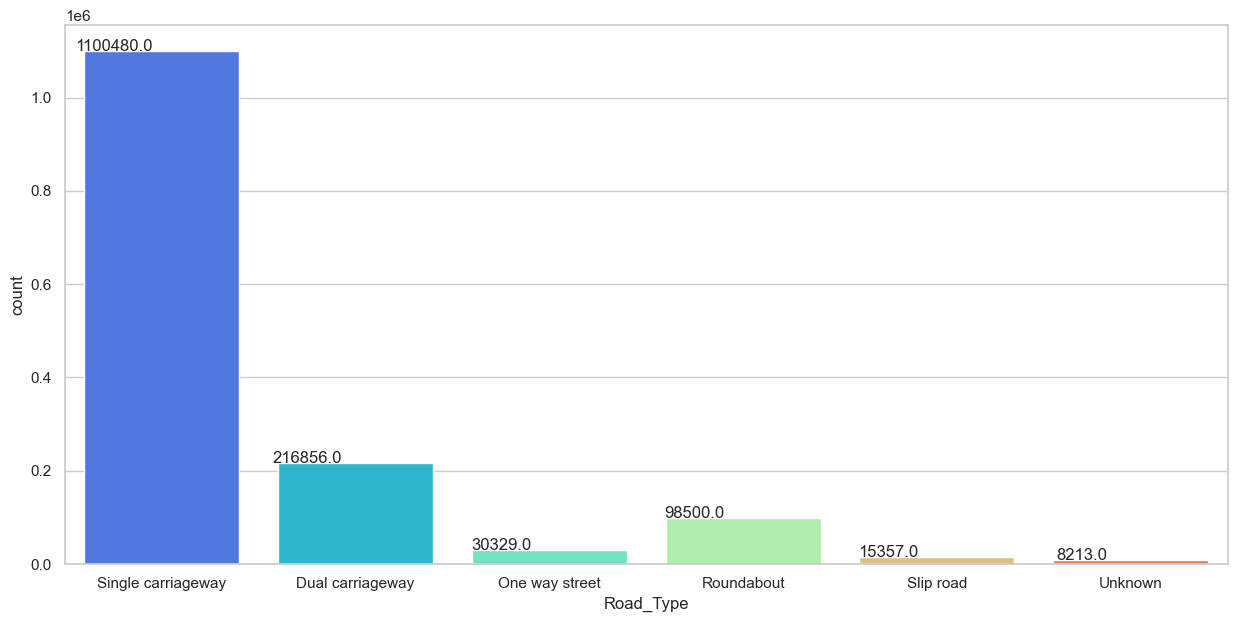

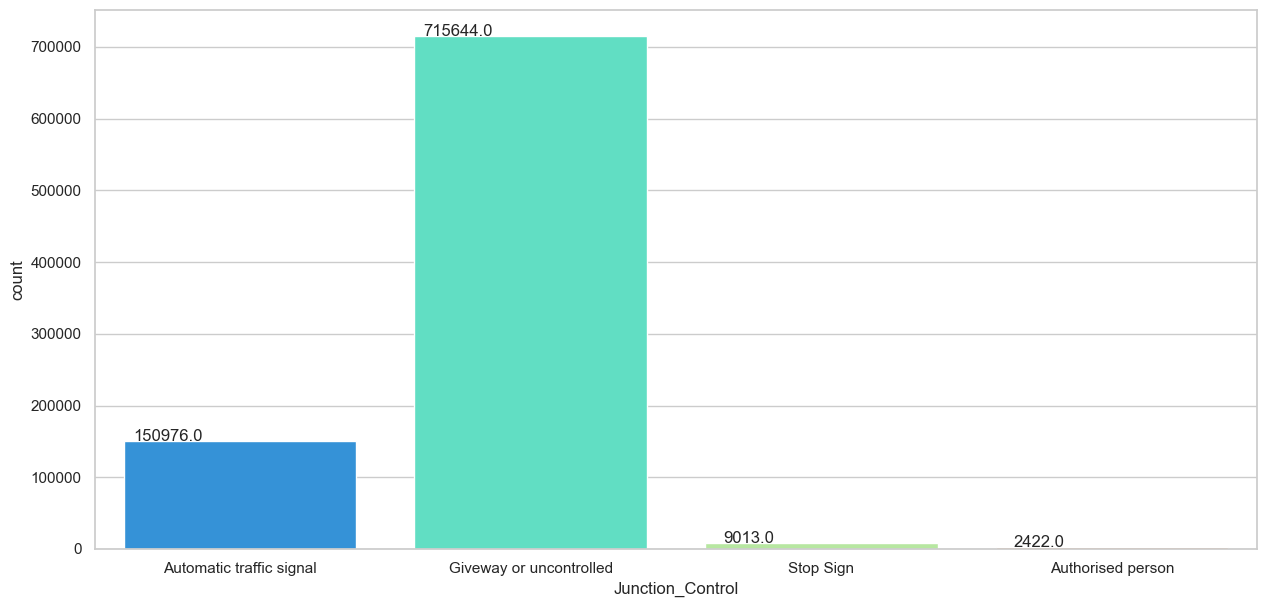

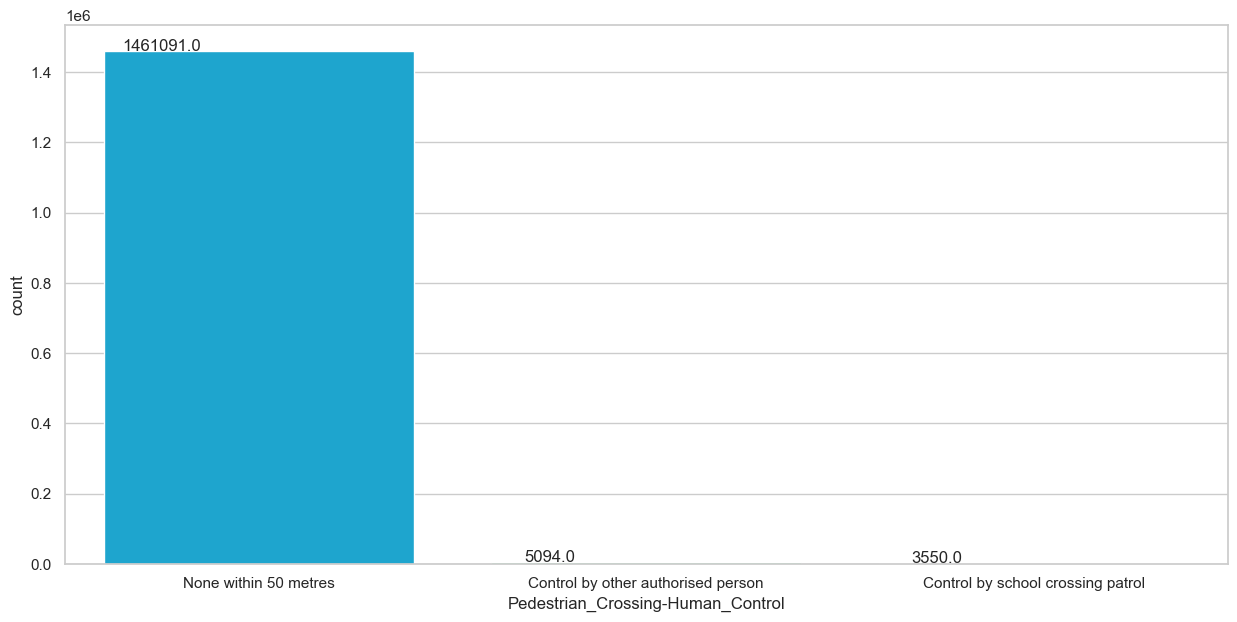

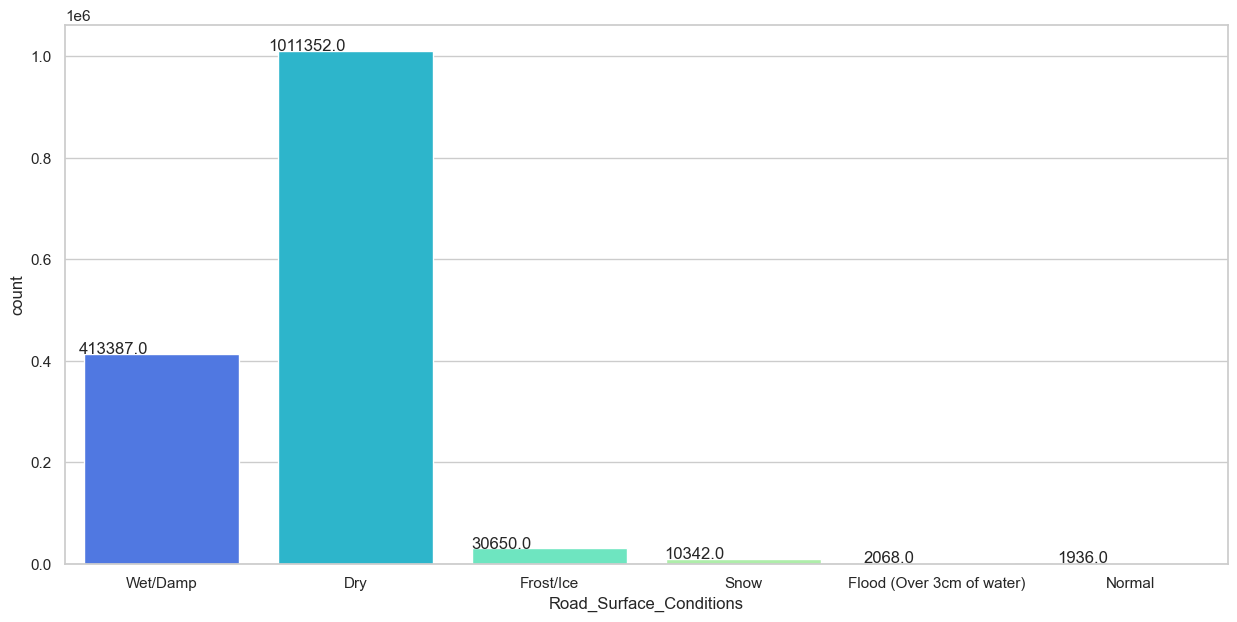

In [24]:
def cnt_plot(data, col):

  plt.figure(figsize=(15, 7))
  ax1 = sns.countplot(x=col, data=data,palette='rainbow')

  for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha='center')

  plt.show()

  print('\n')

cnt_lst1 = ['Road_Type', 'Junction_Control',
           'Pedestrian_Crossing-Human_Control',
           'Road_Surface_Conditions']

for col in cnt_lst1:
  cnt_plot(df, col)

In [25]:
#In most of the accidents,
#The road was single carriageway.
#The junction was either uncontrolled junction or there wasn't any junction at all.
#There were no human controlled pedestrian crossing within 50 metres of the spot.
#The weather was dry.

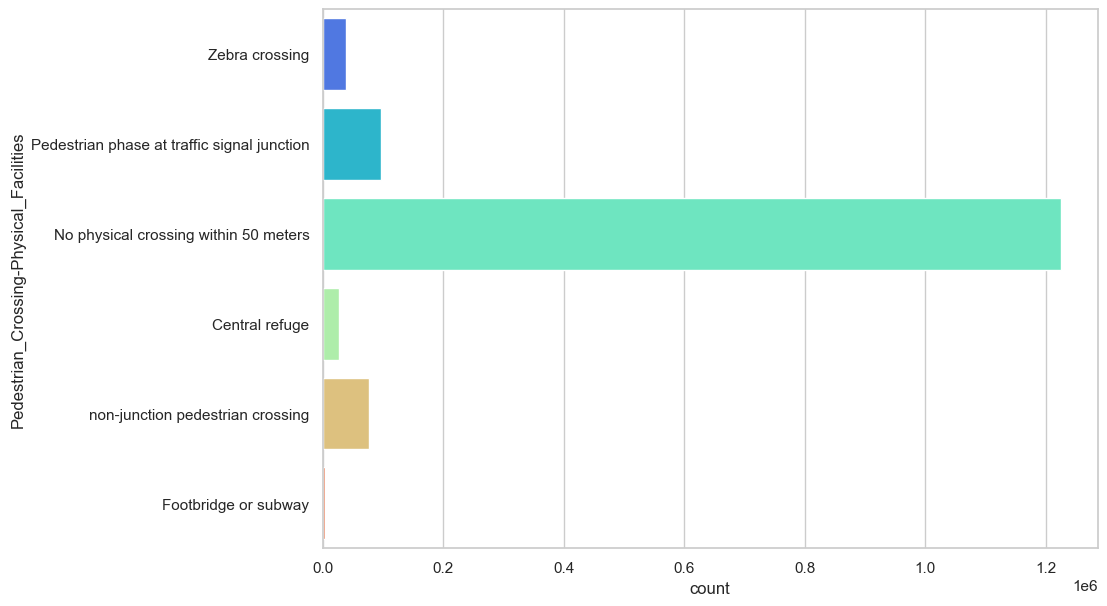

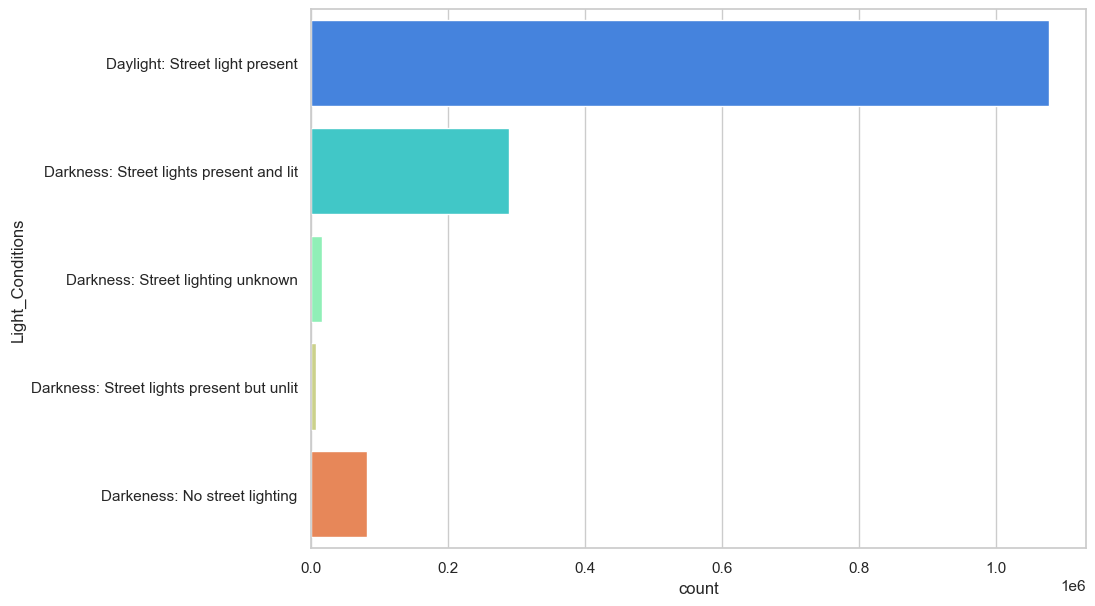

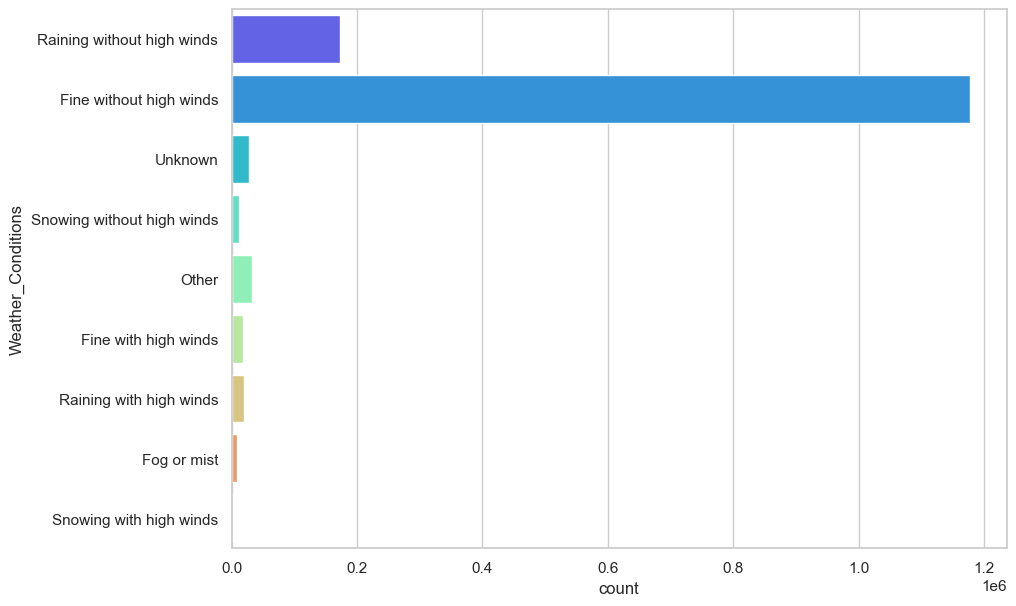

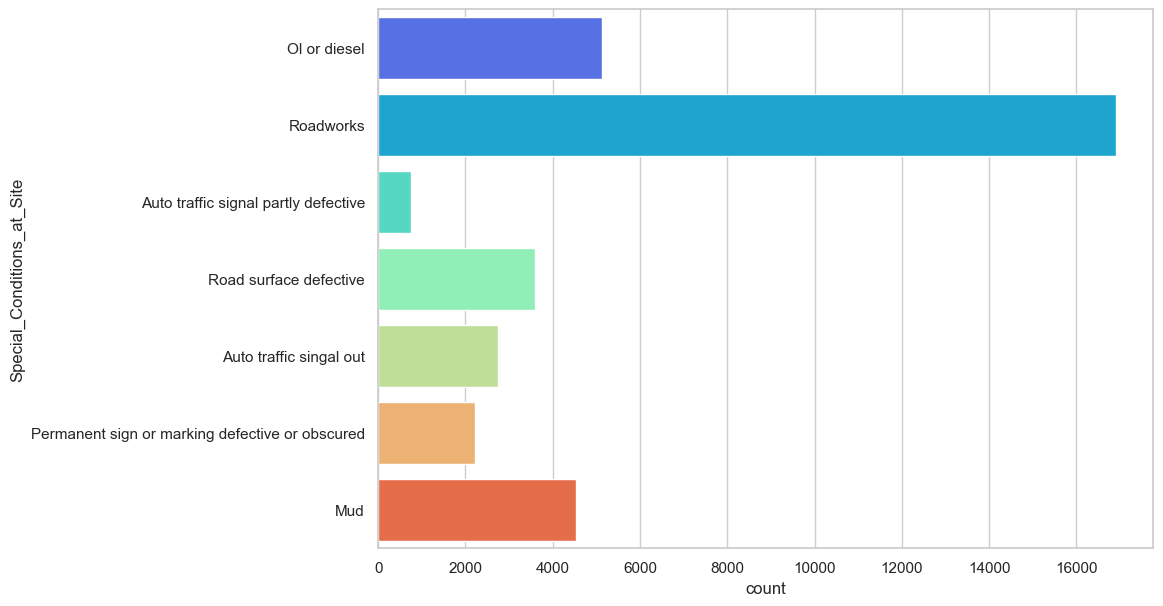

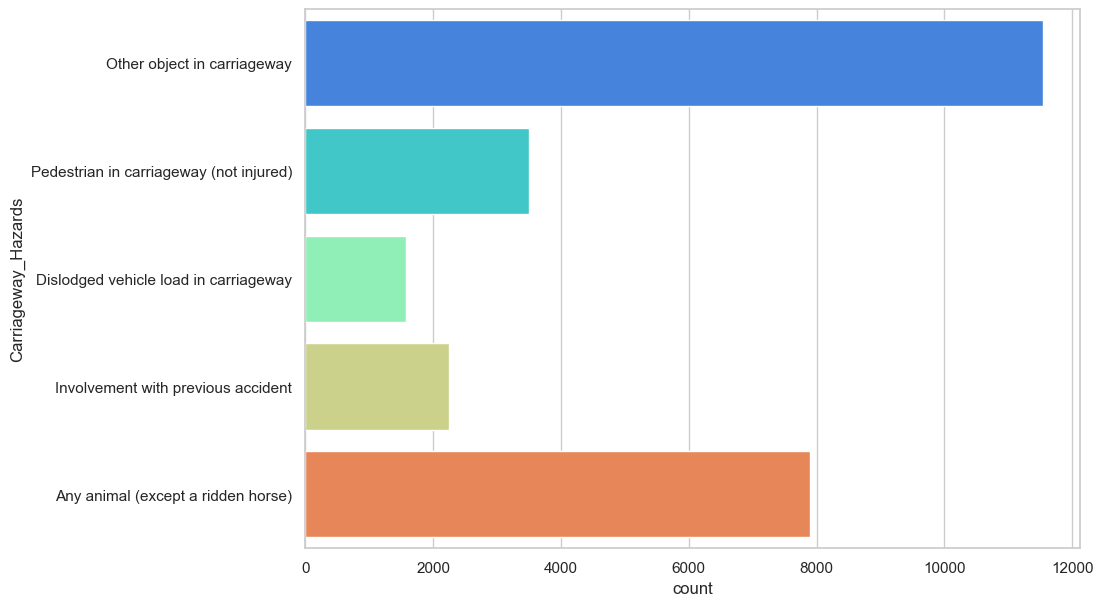

In [26]:
def cnt_plot(data, col):

  plt.figure(figsize=(10, 7))
  sns.countplot(y=col, data=data,palette='rainbow')
  plt.show()

  print('\n')
  
cnt_lst2 = ['Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
            'Weather_Conditions',
            'Special_Conditions_at_Site', 'Carriageway_Hazards']

for col in cnt_lst2:
  cnt_plot(df, col)

In [27]:
#In most of the accidents,

#There was no physical crossing within 50 metres of the spot.

#Happened in daylight so the visibility was fine.

#The weather was fine without high winds.

#There wasn't any special condition or any problem with the carriageway

In [28]:
df.sample(5)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
830244,20104100F0956,-0.26,51.73,41,2,1,2,14/09/2010,3,2026-01-07 05:40:00,5,175,Single carriageway,60,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,NaN,NaN,2,Yes,2010
672055,20094100G0466,-0.28,51.95,41,3,1,1,30/07/2009,5,2026-01-07 18:35:00,6,417,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,2009
91281,200522DC43096,-2.23,52.41,22,3,2,3,06/02/2005,1,2026-01-07 00:30:00,3,449,Single carriageway,60,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,2,Yes,2005
488310,2.01E+12,-0.13,52.19,35,3,1,1,22/01/2007,2,2026-01-07 12:40:00,5,177,Single carriageway,60,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine with high winds,Wet/Damp,NaN,NaN,2,Yes,2007
856394,2.01047E+12,-0.29,51.08,47,3,2,3,09/07/2010,6,2026-01-07 09:55:00,4,2195,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,2,Yes,2010


In [29]:
df['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
1    945654
2    524046
3        35
Name: count, dtype: int64

In [31]:
df['Urban_or_Rural_Area'].replace(3, 1, inplace=True)

In [32]:
df['Accident_Severity'].value_counts()

Accident_Severity
3    1251820
2     198876
1      19039
Name: count, dtype: int64

In [33]:
df['Number_of_Vehicles'].value_counts()[:10]


Number_of_Vehicles
2     873497
1     445264
3     117598
4      24975
5       5536
6       1704
7        600
8        287
9        130
10        63
Name: count, dtype: int64

In [34]:
df['Number_of_Casualties'].value_counts()[:10]

Number_of_Casualties
1     1127319
2      235991
3       67298
4       24406
5        9001
6        3385
7        1129
8         496
9         237
10        131
Name: count, dtype: int64

In [35]:
dt1 = df.groupby('Date')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt1, x='Date', y='No. of Accidents',
              labels={'index': 'Date', 'value': 'No. of Accidents'})
fig.show()

In [36]:
dt2 = df.groupby('Year')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt2, x='Year', y='No. of Accidents',
              labels={'index': 'Year', 'value': 'No. of Accidents'})
fig.show()

In [37]:
dt3 = df.groupby('Day_of_Week')['Accident_Index'].count()\
.reset_index()\
.rename(columns={'Accident_Index':'No. of Accidents'})

fig = px.line(dt3, x='Day_of_Week', y='No. of Accidents',
              labels={'index': 'Day_of_Week', 'value': 'No. of Accidents'})
fig.show()

In [38]:
cat_cols

Index(['Accident_Index', 'Date', 'Road_Type', 'Junction_Control',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [39]:
len(df['Accident_Index'].unique())
df.drop('Accident_Index',axis=1,inplace=True)

In [40]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,04/01/2005,3,2026-01-07 17:42:00,3,3218,Single carriageway,30,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,2005
1,-0.21,51.52,1,3,1,1,05/01/2005,4,2026-01-07 17:36:00,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
2,-0.21,51.53,1,3,2,1,06/01/2005,5,2026-01-07 00:15:00,5,0,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
3,-0.17,51.48,1,3,1,1,07/01/2005,6,2026-01-07 10:35:00,3,3220,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,2005
4,-0.16,51.50,1,3,1,1,10/01/2005,2,2026-01-07 21:13:00,6,0,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,2005


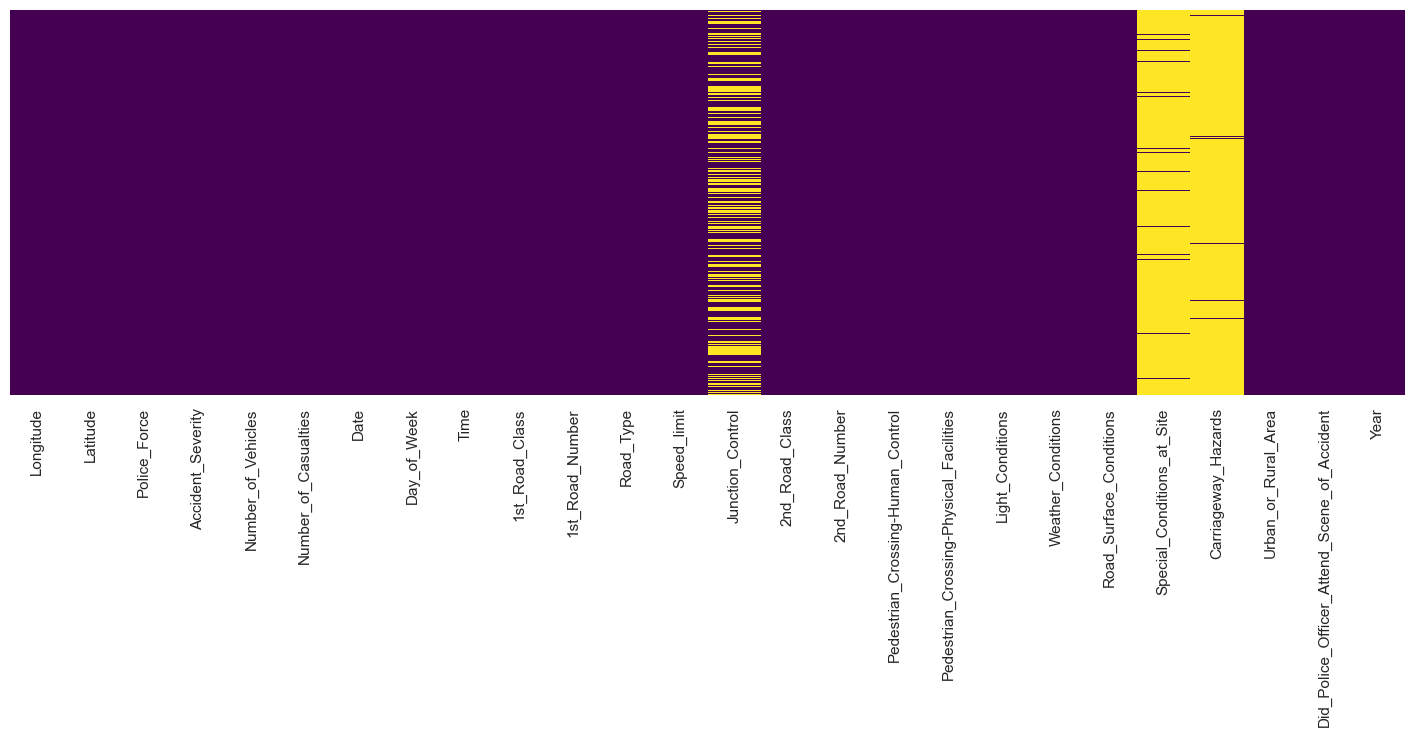

In [41]:
plt.figure(figsize=(18, 5))
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

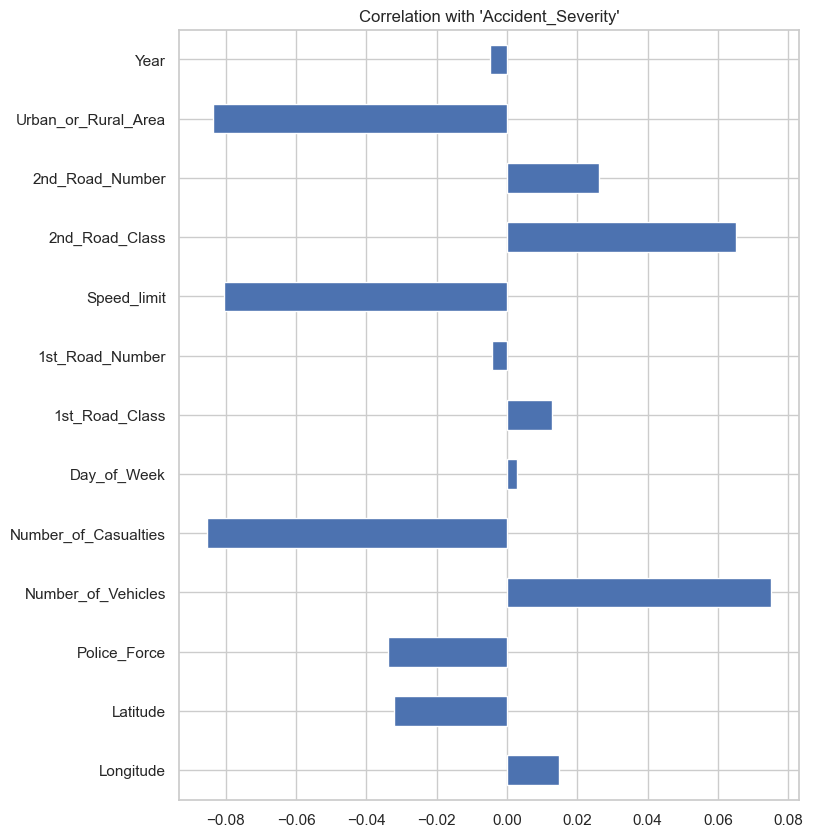

In [42]:
X_numeric = df.drop(columns=['Accident_Severity'], axis=1).select_dtypes(include='number')
target_series = df['Accident_Severity']

plt.figure(figsize=(8, 10))
X_numeric.corrwith(target_series).plot(kind='barh', title=f"Correlation with '{target_series.name}'")
plt.show()

In [43]:
#Feature Engineering and Scaling¶
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_cols)

['Date', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident']


In [44]:
for feature in cat_cols:
    print(f'The {feature} has following number of {len(df[feature].unique())}')

The Date has following number of 3286
The Road_Type has following number of 6
The Junction_Control has following number of 5
The Pedestrian_Crossing-Human_Control has following number of 3
The Pedestrian_Crossing-Physical_Facilities has following number of 6
The Light_Conditions has following number of 5
The Weather_Conditions has following number of 9
The Road_Surface_Conditions has following number of 6
The Special_Conditions_at_Site has following number of 8
The Carriageway_Hazards has following number of 6
The Did_Police_Officer_Attend_Scene_of_Accident has following number of 2


In [45]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [46]:
for feature in cat_cols:
    df[feature]=labelencoder.fit_transform(df[feature])


In [47]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,-0.19,51.49,1,2,1,1,324,3,2026-01-07 17:42:00,3,3218,3,30,4,-1,0,2,4,4,5,5,7,5,1,1,2005
1,-0.21,51.52,1,3,1,1,432,4,2026-01-07 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,7,5,1,1,2005
2,-0.21,51.53,1,3,2,1,540,5,2026-01-07 00:15:00,5,0,3,30,4,-1,0,2,2,2,1,0,7,5,1,1,2005
3,-0.17,51.48,1,3,1,1,648,6,2026-01-07 10:35:00,3,3220,3,30,4,-1,0,2,2,4,1,0,7,5,1,1,2005
4,-0.16,51.50,1,3,1,1,972,2,2026-01-07 21:13:00,6,0,3,30,4,-1,0,2,2,1,1,5,7,5,1,1,2005


In [48]:
df.drop('Year',axis=1,inplace=True)

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df["day"] = df['Date'].dt.day
df["month"] = df['Date'].dt.month
df["year"] = df['Date'].dt.year

In [50]:
df.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,day,month,year
0,-0.19,51.49,1,2,1,1,1970-01-01 00:00:00.000000324,3,2026-01-07 17:42:00,3,3218,3,30,4,-1,0,2,4,4,5,5,7,5,1,1,1,1,1970
1,-0.21,51.52,1,3,1,1,1970-01-01 00:00:00.000000432,4,2026-01-07 17:36:00,4,450,0,30,1,5,0,2,3,2,1,0,7,5,1,1,1,1,1970
2,-0.21,51.53,1,3,2,1,1970-01-01 00:00:00.000000540,5,2026-01-07 00:15:00,5,0,3,30,4,-1,0,2,2,2,1,0,7,5,1,1,1,1,1970
3,-0.17,51.48,1,3,1,1,1970-01-01 00:00:00.000000648,6,2026-01-07 10:35:00,3,3220,3,30,4,-1,0,2,2,4,1,0,7,5,1,1,1,1,1970
4,-0.16,51.50,1,3,1,1,1970-01-01 00:00:00.000000972,2,2026-01-07 21:13:00,6,0,3,30,4,-1,0,2,2,1,1,5,7,5,1,1,1,1,1970


In [51]:
df.drop("Date",axis=1,inplace=True)
df.drop("Time",axis=1,inplace=True)

In [52]:
df['Accident_Severity']=df['Accident_Severity'].map({1:0,2:1,3:2})

In [53]:
df.to_csv("processed_dataset.csv", index=False)
print("Processed dataset saved!")


Processed dataset saved!
